# Два запроса с соединением INNER JOIN двух таблиц
## Выведем прибыль для каждого заказа
````sql
SELECT ITEMS.O_ID,
	   SUM(B_PRICE * ITEMS.B_COUNT) AS profit
  FROM BOOKS
 INNER JOIN ITEMS 
    ON ITEMS.B_ID = BOOKS.B_CONTRACT
 GROUP BY ITEMS.O_ID;

````


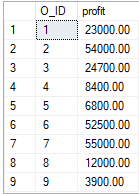

## Выведем зарплату каждого сотрудника. Результат отсортируем по фамилии  и убыванию зп.
````sql
SELECT EMPLOYEES.E_FNAME,
       EMPLOYEES.E_LNAME,
	   POSTS.P_SAL
  FROM EMPLOYEES
 INNER JOIN POSTS 
    ON POSTS.P_ID = EMPLOYEES.E_POST
 ORDER BY EMPLOYEES.E_FNAME, POSTS.P_SAL DESC;

````

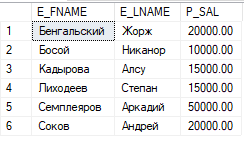

# Два запроса с соединением INNER JOIN трех таблиц

## Выведем название всех книг редактором которых был Бенгальский
````sql
 SELECT  BOOKS.B_TITLE
  FROM EMPLOYEES
 INNER JOIN EDITORS
    ON EDITORS.E_ID = EMPLOYEES.E_ID
 INNER JOIN BOOKS 
    ON BOOKS.B_CONTRACT = EDITORS.B_ID
 WHERE EMPLOYEES.E_FNAME = 'Бенгальский';

````


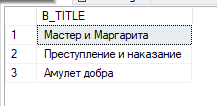

## Выведем для каждой книги фамилии менеджера и редактора 
````sql
SELECT 
	   BOOKS.B_TITLE, 
	   man.E_FNAME AS MAN,
	   edit.E_FNAME AS EDIT
  FROM BOOKS
 INNER JOIN EMPLOYEES AS man
    ON man.E_ID = BOOKS.B_MAN
 INNER JOIN EMPLOYEES AS edit 
    ON edit.E_ID = BOOKS.B_EDIT
 ORDER BY BOOKS.B_TITLE;

````

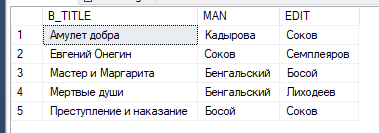

# Один запрос с соединением INNER JOIN четырех и более таблиц

## Выведем, какие книги и сколько купил заказчик с идентификатором = 1, отсортируем по уменьшению  объема закупок 
````sql
  SELECT BOOKS.B_TITLE,
        SUM(ITEMS.B_COUNT) AS TOTAL
   FROM CUSTOMERS
  INNER JOIN ORDERS
     ON ORDERS.O_COMPANY = CUSTOMERS.C_ID
  INNER JOIN ITEMS
     ON ITEMS.O_ID = ORDERS.O_ID
  INNER JOIN BOOKS 
     ON BOOKS.B_CONTRACT = ITEMS.B_ID
  WHERE CUSTOMERS.C_ID = 1
  GROUP BY BOOKS.B_CONTRACT, BOOKS.B_TITLE
  ORDER BY TOTAL DESC;

````


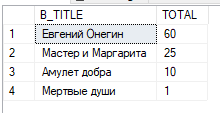

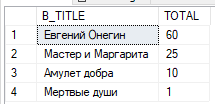

# Один запрос для каждого из типов соединений: FULL OUTER JOIN, LEFT OUTER JOIN, RIGHT OUTER JOIN, CROSS JOIN

## Выведем только тех заказчиков, которые уже заказывали что-то и список их заказов, используем RIGHT OUTER JOIN

```sql
SELECT CUSTOMERS.C_ID,
	   CUSTOMERS.C_NAME,
	   STRING_AGG(ORDERS.O_ID, ', ') AS O_ID
  FROM CUSTOMERS
 RIGHT JOIN ORDERS 
    ON ORDERS.O_COMPANY = CUSTOMERS.C_ID
 GROUP BY CUSTOMERS.C_ID, CUSTOMERS.C_NAME
 ORDER BY CUSTOMERS.C_ID;

```

#### Замечаем, что отсутствует заказчик с идентификатором 3
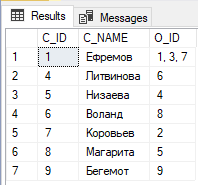

## Решим задачу из пункта выше, но теперь используем LEFT OUTER JOIN
```sql
 SELECT CUSTOMERS.C_ID,
	   CUSTOMERS.C_NAME,
	   STRING_AGG(ORDERS.O_ID, ', ') AS O_ID
  FROM ORDERS
  LEFT JOIN CUSTOMERS  
    ON CUSTOMERS.C_ID = ORDERS.O_COMPANY
 GROUP BY CUSTOMERS.C_ID, CUSTOMERS.C_NAME
 ORDER BY CUSTOMERS.C_ID;

```

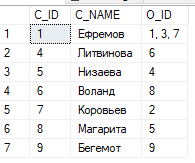

## Посмотрим как отработает запрос если используем правое соединение

```sql
  SELECT CUSTOMERS.C_ID,
	   CUSTOMERS.C_NAME,
	   STRING_AGG(ORDERS.O_ID, ', ') AS O_ID
  FROM ORDERS
 RIGHT JOIN CUSTOMERS  
    ON CUSTOMERS.C_ID = ORDERS.O_COMPANY
 GROUP BY CUSTOMERS.C_ID, CUSTOMERS.C_NAME
 ORDER BY CUSTOMERS.C_ID;

```

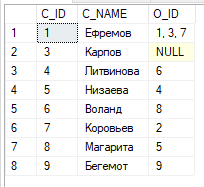

## Для следующего типа соединения, нам необходимо добавить данные в таблицы СОТРУДНИКИ (Employees) и КОМНАТЫ (Rooms). Выполним следующие запросы.

```sql

INSERT INTO EMPLOYEES VALUES
('Белозерская', 'Любовь', '1995-01-27', 1, 2, NULL, NULL, '148854720140', '4712 001745', 'г. Москва, ул.', '2018-01-30' , NULL);

INSERT INTO ROOMS VALUES
(7, '24-41-18');

```

## Выведем фамилии всех сотрудников и их кабинеты, так чтобы мы смогли увидеть все кабинеты компании 

```sql
SELECT EMPLOYEES.E_FNAME,
	   ROOMS.R_NO
  FROM EMPLOYEES
  FULL JOIN ROOMS
    ON ROOMS.R_NO = EMPLOYEES.E_ROOM
   AND ROOMS.R_TEL = EMPLOYEES.E_TEL;

```

```

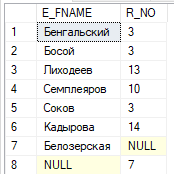

## Как и написано в методическом указании, сложно придумать пример практически применимого использования CROSS JOIN-а на данной БД. Поэтому просто сгенерируем набор дат, когда заказы были завершены и выполним перекрестное объединение со всеми книгами, имеющимися в базе данных. В последующем для каждой комбинации книга/день можно вычислить объем продаж или остаток книг.

```sql
SELECT BOOKS.B_TITLE,
	   ORDERS.O_READY
  FROM BOOKS
 CROSS JOIN ORDERS;

```

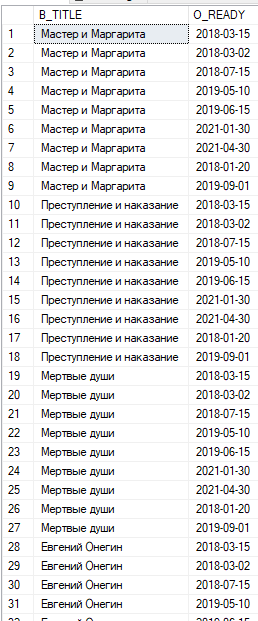

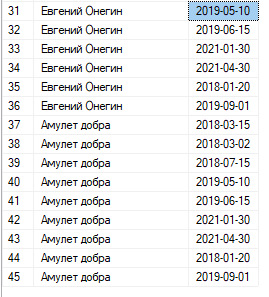